<a href="https://colab.research.google.com/github/ayush-kumarsinha/model-machine-learning/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple linear regression

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("height-weight .csv")

In [ ]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

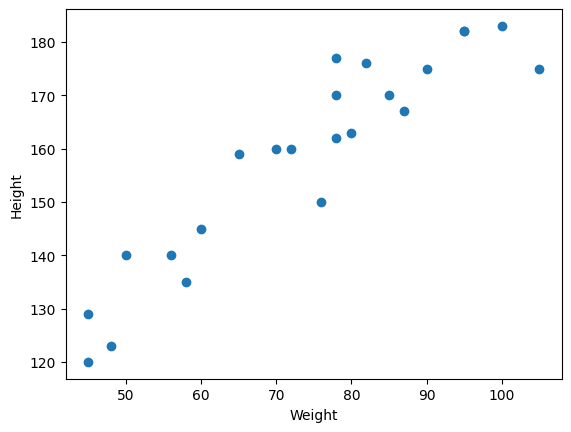

In [ ]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [ ]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [ ]:
df.isnull().sum()

,0
Weight,0
Height,0


In [ ]:
## Divide our dataset into independent and dependent features
X = df[['Weight']]  ## independent feature,  column wise dataset
y = df['Height']  ## dependent feature,  Series wide dataset

In [ ]:
X.shape

(23, 1)

In [ ]:
y.shape

(23,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape,X_test.shape

((18, 1), (5, 1))

In [ ]:
y_train.shape,y_test.shape

((18,), (5,))

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

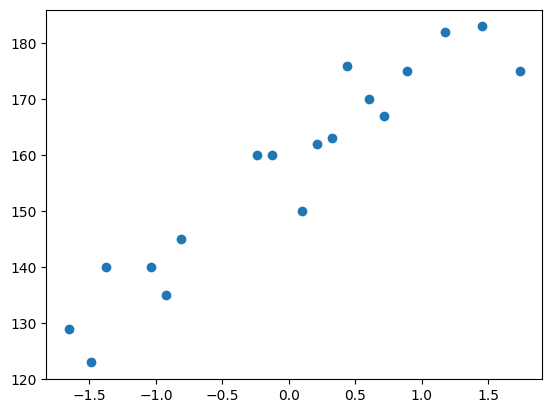

In [ ]:
plt.scatter(X_train,y_train)

In [ ]:
## if you want to add the new data in dataset

scaler.transform([[80]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [ ]:
## Model Training

from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression()  # this is a object

In [ ]:
## Training the train data

regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
regressor.intercept_

np.float64(157.5)

In [ ]:
regressor.coef_

array([17.03440872])

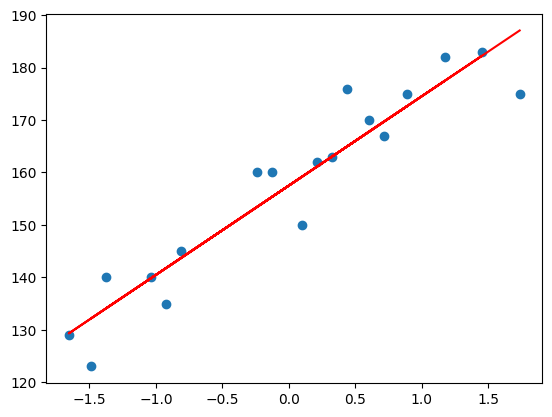

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),color='red')

In [ ]:
# Predition of train data
1. prediction height output = intercept + coef_(Weights)
2. y_pred_train = 157.5 + 17.03(X_train)

# Prediction of teh test data
1. prediction height output = intercept + coef_(Weights)
2. y_pred_test = 157.5 + 17.03(X_train)

In [ ]:
## Prediction for test data
y_pred_test = regressor.predict(X_test)

In [ ]:
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [ ]:
y_test

,Height
15,177
9,170
0,120
8,182
17,159


Performance matrics MAE, MSE,RMSE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [ ]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


## Accuracy of the model R Squared and Adjusted r Squared

formula

**R Squared**

- R^2 = Accuray of the model
- SSR = sum of squares of residuals
- SST = total sum of squares
- R^2 = SSR/SST

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
score = r2_score(y_test,y_pred_test)
score


0.776986986042344

## Adjusted r square
** Adjusted R2 = 1 - [(1-R2)*(n-1)/(n-k-1)]**

where:

R² = Model ka R-squared score

n = Total observations (data points)

k = Predictor variables ki sankhya (features)


In [ ]:
# Adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [ ]:
scaler

StandardScaler()

In [ ]:
regressor

LinearRegression()